# Environment Impact of Food Production Analysis Project

### Project Roadmap (CRISP-DM)
* Business Understanding – Define objectives, hypothesis, and key questions.
* Data Understanding – Load and inspect the dataset.
* Data Preparation – Handle missing values, clean the dataset, and prepare features.
* Exploratory Data Analysis (EDA) – Visualize key trends in carbon emissions, water use, and land use.
* Feature Engineering – Create new insights from the existing data.
* Modeling – Identify patterns and develop predictive insights.
* Evaluation & Recommendations – Provide sustainability recommendations.

## Business Understanding 

Objective
* This project analyzes the environmental impact of food production, focusing on key metrics like:
1. Carbon emissions
2. Water usage
3. Land use
4. Biodiversity loss

The goal is to uncover trends and provide sustainability recommendations.

*Key Business Questions*
1. Which food products have the highest environmental impact?
2. How do plant-based vs. animal-based foods compare in sustainability?
3. What are the key drivers of high carbon emissions and resource consumption?
4. What recommendations can be made for a more sustainable food system?

*Hypothesis*
1. Animal-based food production has a significantly higher environmental impact than plant-based food production.
2. Regions with high food production output tend to have greater land and water use.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import missingno as msno
from scipy.stats import shapiro, levene
from scipy.stats import mannwhitneyu


print("All packages installed successfully!")

All packages installed successfully!


In [3]:
# Load the dataset
csv_path = "Food_Production.csv"
df = pd.read_csv(csv_path)

# Display basic information and first few rows
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 23 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Food product                                                             43 non-null     object 
 1   Land use change                                                          43 non-null     float64
 2   Animal Feed                                                              43 non-null     float64
 3   Farm                                                                     43 non-null     float64
 4   Processing                                                               43 non-null     float64
 5   Transport                                                                43 non-null     float64
 6   Packging                                                                 43 

(None,
           Food product  Land use change  Animal Feed  Farm  Processing  \
 0  Wheat & Rye (Bread)              0.1          0.0   0.8         0.2   
 1         Maize (Meal)              0.3          0.0   0.5         0.1   
 2        Barley (Beer)              0.0          0.0   0.2         0.1   
 3              Oatmeal              0.0          0.0   1.4         0.0   
 4                 Rice              0.0          0.0   3.6         0.1   
 
    Transport  Packging  Retail  Total_emissions  \
 0        0.1       0.1     0.1              1.4   
 1        0.1       0.1     0.0              1.1   
 2        0.0       0.5     0.3              1.1   
 3        0.1       0.1     0.0              1.6   
 4        0.1       0.1     0.1              4.0   
 
    Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)  ...  \
 0                                                NaN         ...   
 1                                                NaN         ...   
 2                  

## Data Cleaning 

*Observations*
1. Missing Values: Some columns have missing values (e.g., "Eutrophying emissions per 1000kcal").
2. Units Are Different: Some metrics are per kilogram, while others are per kcal or per 100g protein.
3. Possible Outliers: Some values (e.g., water use) appear very high.

*Action Plan*
* Handle missing values (drop or impute where necessary).
* Standardize units for easier comparison.
* Check for outliers in critical columns.

In [4]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)                   10
Eutrophying emissions per kilogram (gPO₄eq per kilogram)                    5
Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)      16
Freshwater withdrawals per 1000kcal (liters per 1000kcal)                  13
Freshwater withdrawals per 100g protein (liters per 100g protein)          17
Freshwater withdrawals per kilogram (liters per kilogram)                   5
Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)               10
Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)       16
Land use per 1000kcal (m² per 1000kcal)                                    10
Land use per kilogram (m² per kilogram)                                     5
Land use per 100g protein (m² per 100g protein)                            16
Scarcity-weighted water use per kilogram (liters per kilogram)              5
Scarcity-weighted water use per 100g protein (liters per 100g pr

In [5]:
# Get summary statistics
df.describe()


,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),Eutrophying emissions per kilogram (gPO₄eq per kilogram),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,33.000000,38.000000,...,26.000000,38.000000,33.000000,27.000000,33.000000,38.000000,27.000000,38.000000,26.000000,30.000000
mean,1.260465,0.453488,3.469767,0.253488,0.195349,0.269767,0.069767,5.972093,27.181547,46.141316,...,1437.975324,932.605263,5.633943,13.524906,12.423165,29.264474,29.105042,36607.428947,59196.438503,17380.575408
std,3.357730,0.919200,7.083264,0.372475,0.158795,0.342633,0.110270,10.501753,46.445959,82.808808,...,1441.981970,1296.999186,10.613575,19.427462,28.348693,78.490074,49.307339,56891.283046,89928.189299,16232.080209
min,-2.100000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.200000,0.708419,0.690000,...,32.375000,0.000000,0.069919,0.263319,0.273756,0.330000,3.000000,0.000000,421.250000,4.095023
25%,0.000000,0.000000,0.350000,0.000000,0.100000,0.100000,0.000000,0.850000,4.214932,3.752500,...,373.573281,105.500000,0.628415,4.027439,1.312500,1.112500,5.088235,3325.075000,11018.401008,2969.124983
50%,0.200000,0.000000,0.800000,0.100000,0.100000,0.100000,0.000000,1.600000,7.000000,11.460000,...,1083.327272,417.100000,1.351351,6.500000,2.976244,6.865000,7.936314,14533.050000,20917.213595,12605.256790
75%,0.800000,0.000000,2.200000,0.300000,0.200000,0.300000,0.150000,6.000000,26.324324,45.840000,...,1832.386339,1340.375000,5.335135,14.983333,6.605405,14.917500,23.002381,35960.175000,70651.721023,28056.471593
max,16.300000,2.900000,39.400000,1.300000,0.800000,1.600000,0.300000,59.600000,197.357143,365.290000,...,6003.333333,5605.200000,50.946429,93.300000,119.490842,369.810000,184.812594,229889.800000,431620.000000,49735.882350


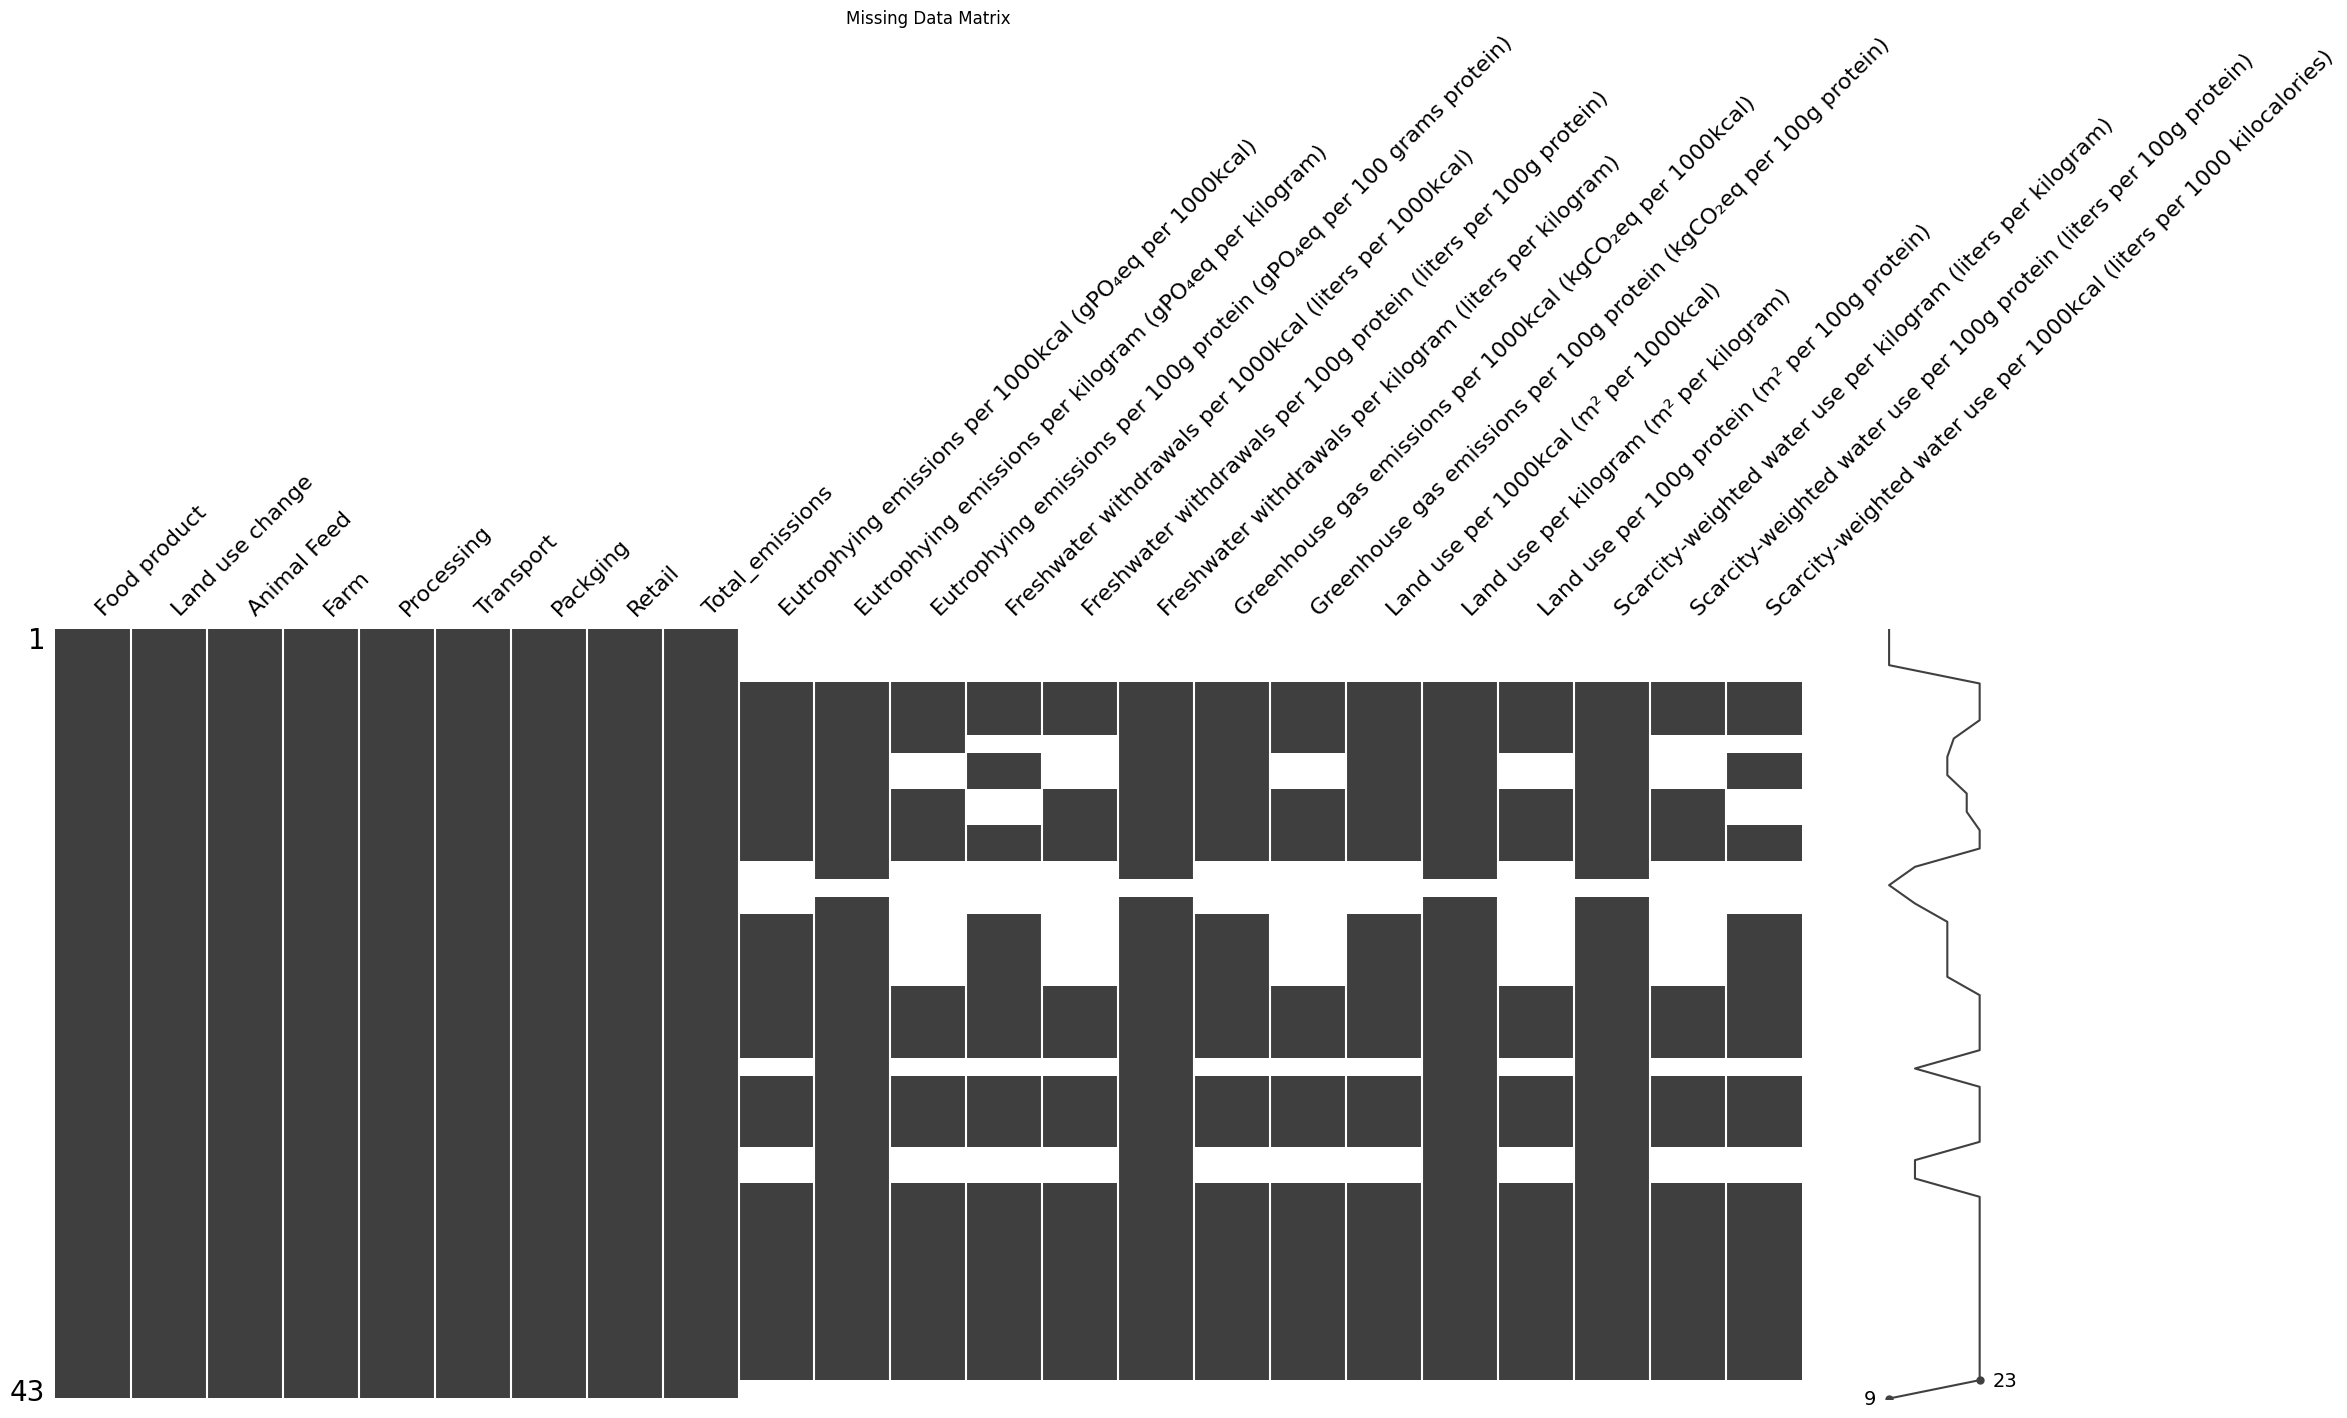

In [6]:
# Missing values matrix
msno.matrix(df)
plt.title("Missing Data Matrix")
plt.show()

In [7]:
# Identify numeric columns only
numeric_cols = df.select_dtypes(include=["number"]).columns

# Fill missing values in numeric columns with the median
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Verify that missing values are handled
df.isnull().sum().sum()  # Should return 0 if all missing values are fixed

0

In [8]:
# Define threshold for missing values (30%)
threshold = 30  

# Calculate the percentage of missing values in each column
missing_values = df.isnull().mean() * 100

# Drop columns with more than 30% missing values
cols_to_drop = missing_values[missing_values > threshold].index
df_cleaned = df.drop(columns=cols_to_drop)

# Select only numeric columns for filling NaN with median
numeric_cols = df_cleaned.select_dtypes(include=['number']).columns
df_cleaned[numeric_cols] = df_cleaned[numeric_cols].fillna(df_cleaned[numeric_cols].median())

# Verify missing values have been handled
print(df_cleaned.isnull().sum())  # Should print 0 for all columns if handled correctly

Food product                                                               0
Land use change                                                            0
Animal Feed                                                                0
Farm                                                                       0
Processing                                                                 0
Transport                                                                  0
Packging                                                                   0
Retail                                                                     0
Total_emissions                                                            0
Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)                   0
Eutrophying emissions per kilogram (gPO₄eq per kilogram)                   0
Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)      0
Freshwater withdrawals per 1000kcal (liters per 1000kcal)                  0

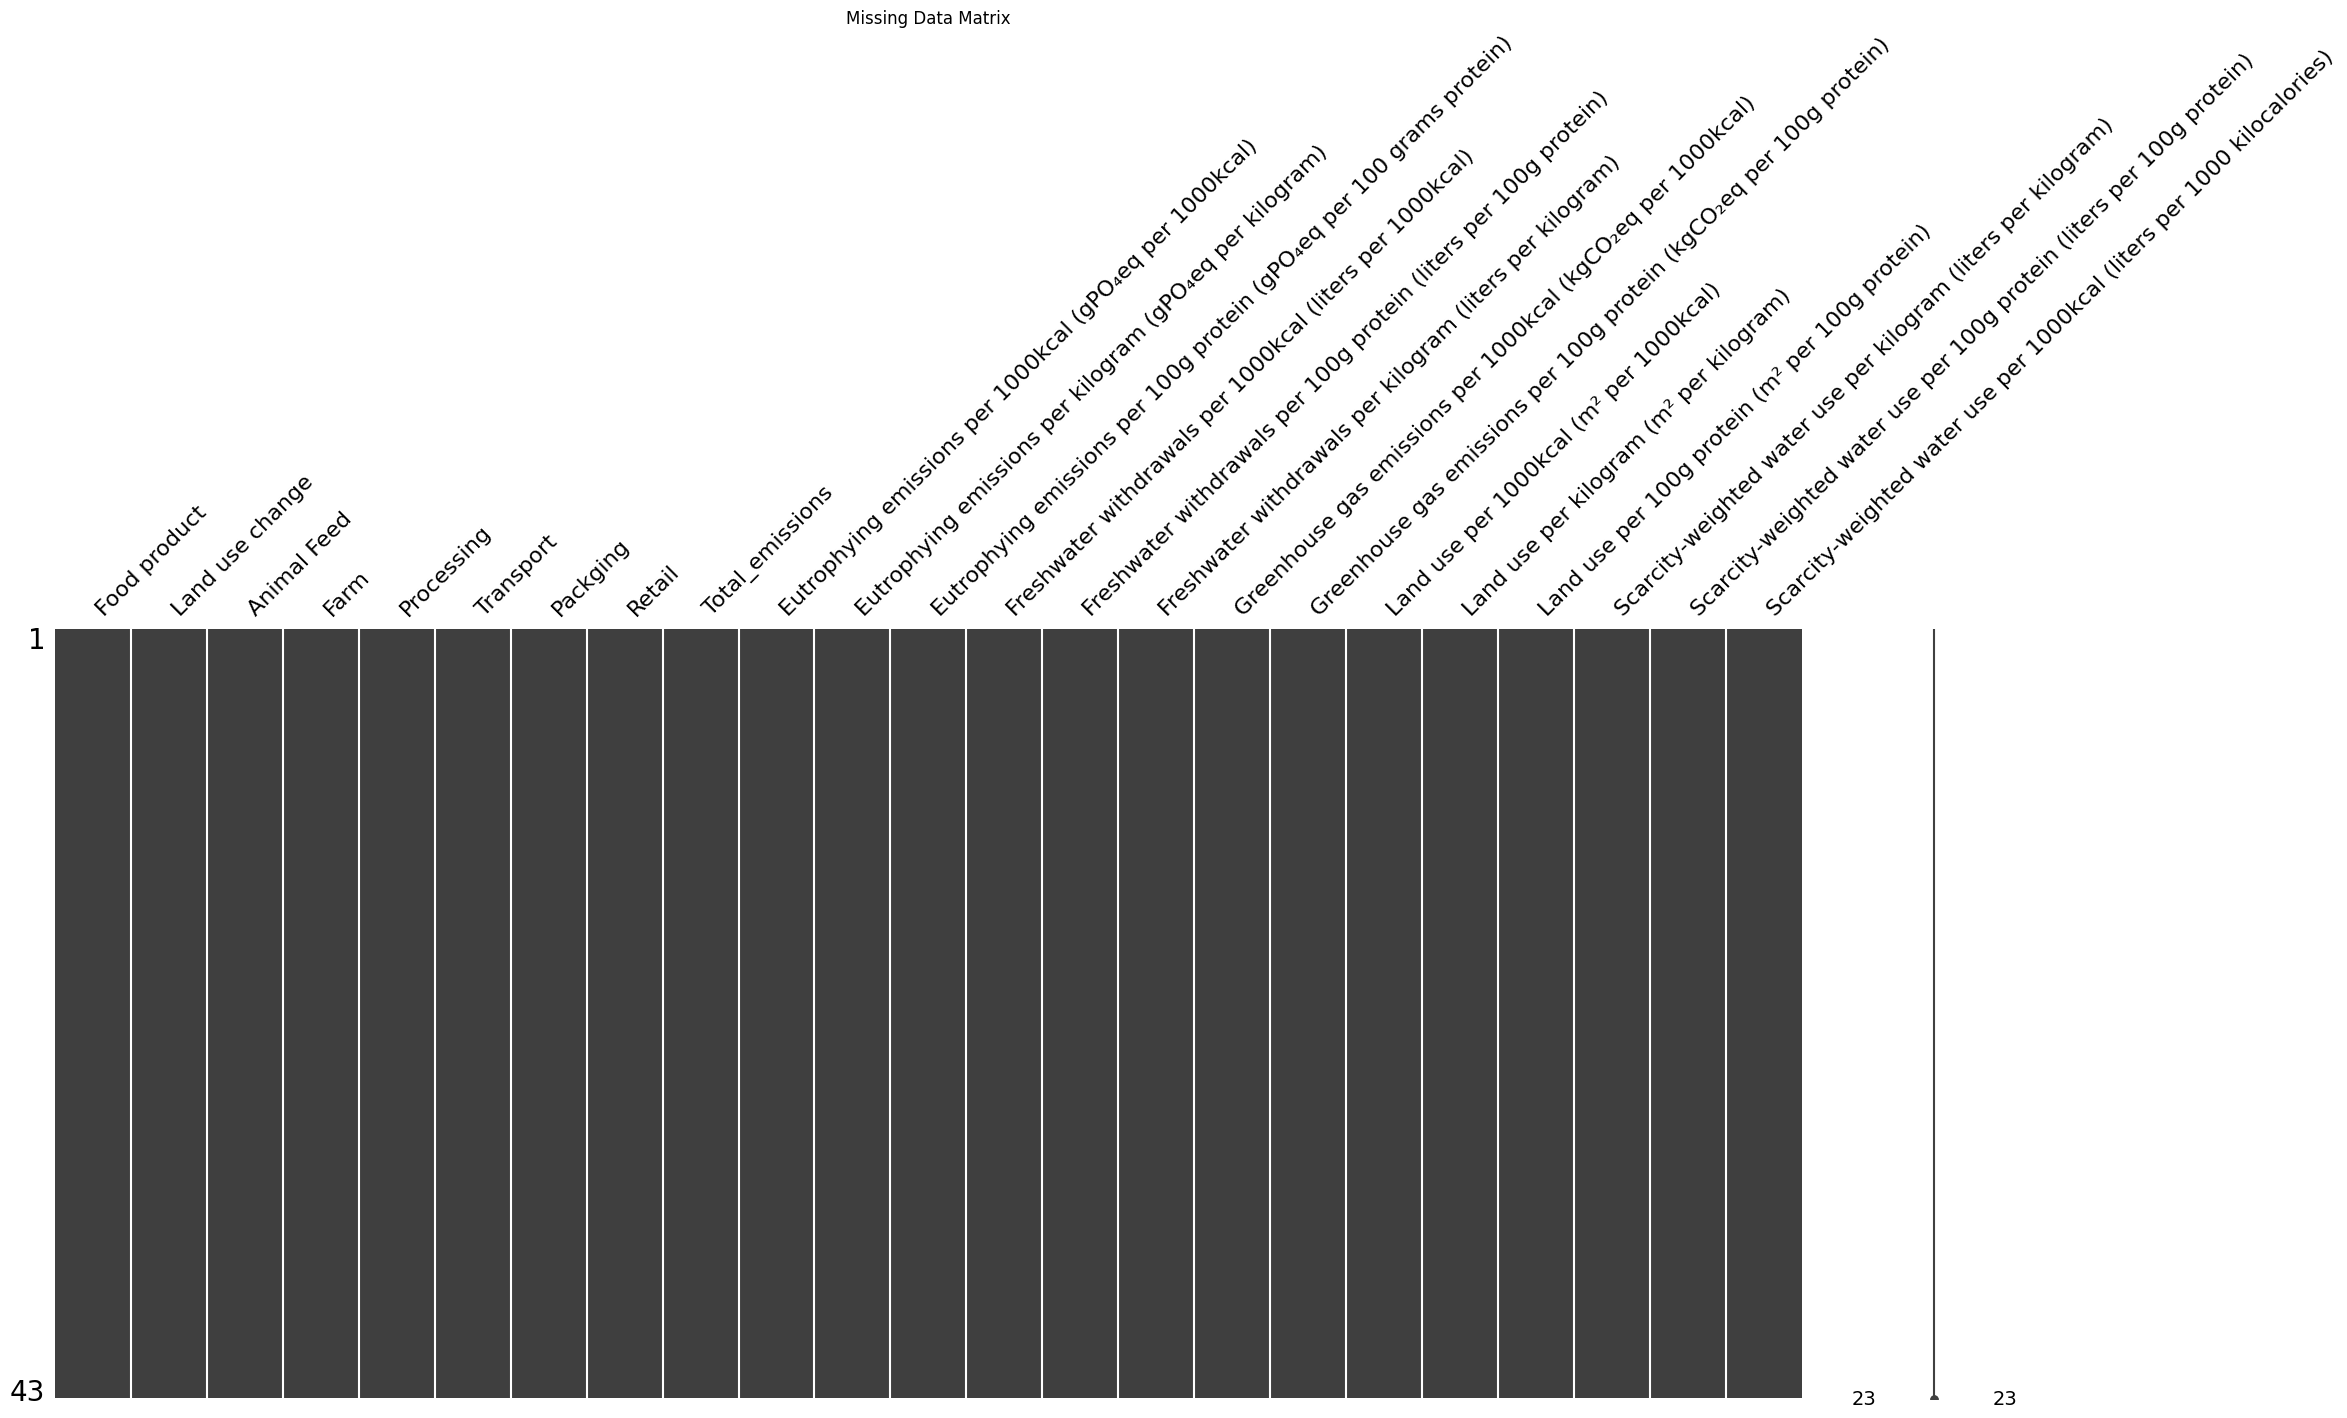

In [9]:
# Missing values matrix
msno.matrix(df)
plt.title("Missing Data Matrix")
plt.show()

## Exploratory Data Analysis (EDA)

*Key Visualizations*
* Top 10 foods with the highest carbon emissions
* Comparison of plant-based vs. animal-based food impacts
* Correlation between different environmental factors

c:\Users\lenovo\Documents\Documents\personal\Azubi Africa\Talent Mobility Program\TMP 3\TMP3---Environment-Impact-of-Food-Production-Analysis-\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8324 (\N{SUBSCRIPT FOUR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\lenovo\Documents\Documents\personal\Azubi Africa\Talent Mobility Program\TMP 3\TMP3---Environment-Impact-of-Food-Production-Analysis-\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


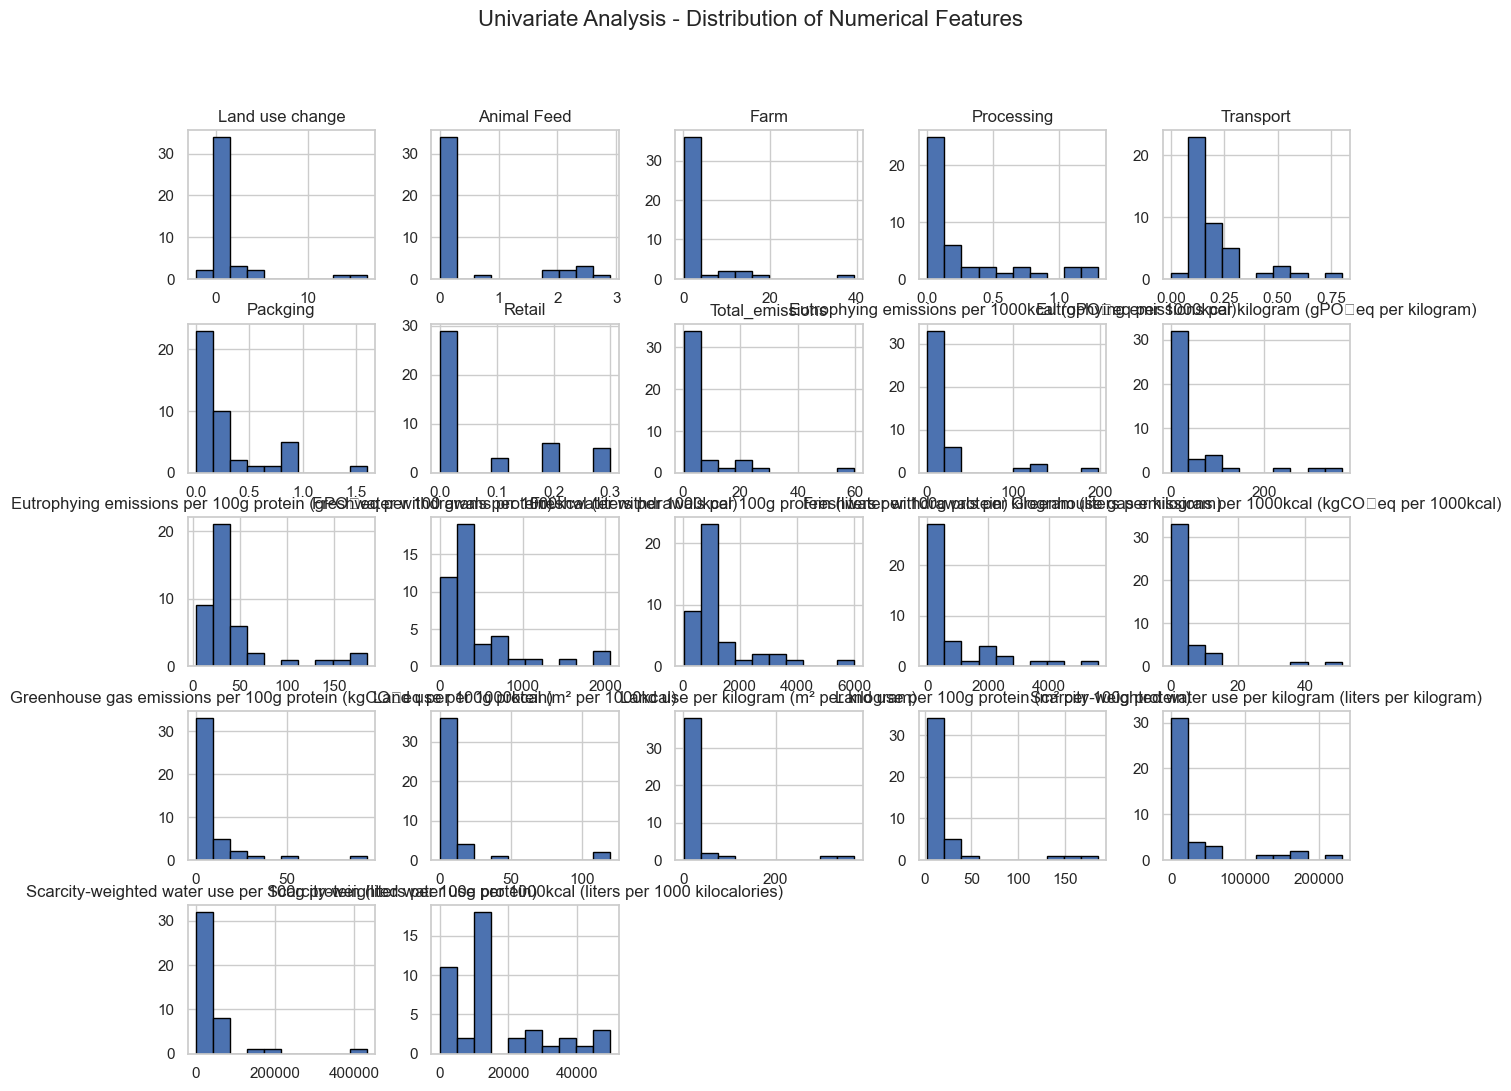

In [10]:
# Set plot style
sns.set(style="whitegrid")

# Select numerical columns for analysis
numeric_cols = df.select_dtypes(include=['float64']).columns

# Plot histograms for numerical columns (Univariate Analysis)
df[numeric_cols].hist(figsize=(15, 12), bins=10, edgecolor='black')
plt.suptitle("Univariate Analysis - Distribution of Numerical Features", fontsize=16)
plt.show()

Univariate Analysis Observations:
* Many variables have right-skewed distributions, meaning a few food products contribute significantly higher values.

* Total emissions, Freshwater withdrawals, and Scarcity-weighted water use have extreme values, likely driven by certain food products.

* Some features have values concentrated near zero, indicating minimal impact for certain foods

C:\Users\lenovo\AppData\Local\Temp\ipykernel_17904\2519614052.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_emitters["Food product"], x=top_emitters["Total_emissions"], palette="Reds_r")
c:\Users\lenovo\Documents\Documents\personal\Azubi Africa\Talent Mobility Program\TMP 3\TMP3---Environment-Impact-of-Food-Production-Analysis-\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


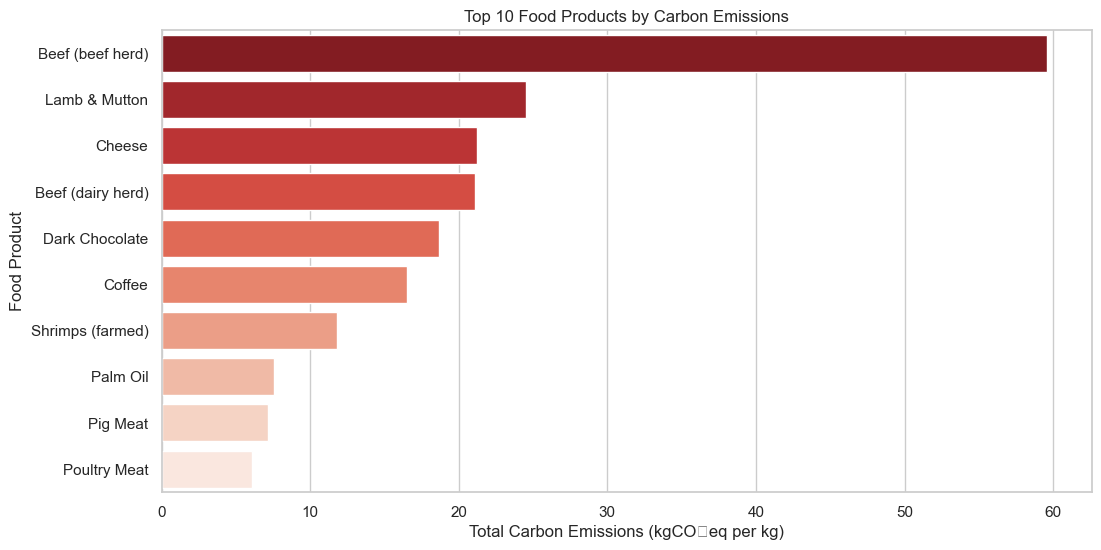

In [11]:
# Set visualization style
sns.set_style("whitegrid")

# Top 10 foods with highest carbon emissions
top_emitters = df_cleaned.nlargest(10, "Total_emissions")

plt.figure(figsize=(12, 6))
sns.barplot(y=top_emitters["Food product"], x=top_emitters["Total_emissions"], palette="Reds_r")
plt.xlabel("Total Carbon Emissions (kgCO₂eq per kg)")
plt.ylabel("Food Product")
plt.title("Top 10 Food Products by Carbon Emissions")
plt.show()

 Insights from the Chart

Animal-based foods (e.g., beef, lamb, cheese) have the highest carbon footprint.
Plant-based foods (e.g., nuts, grains) have significantly lower emissions.
This supports the hypothesis that animal-based food production has a significantly higher environmental impact.

c:\Users\lenovo\Documents\Documents\personal\Azubi Africa\Talent Mobility Program\TMP 3\TMP3---Environment-Impact-of-Food-Production-Analysis-\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


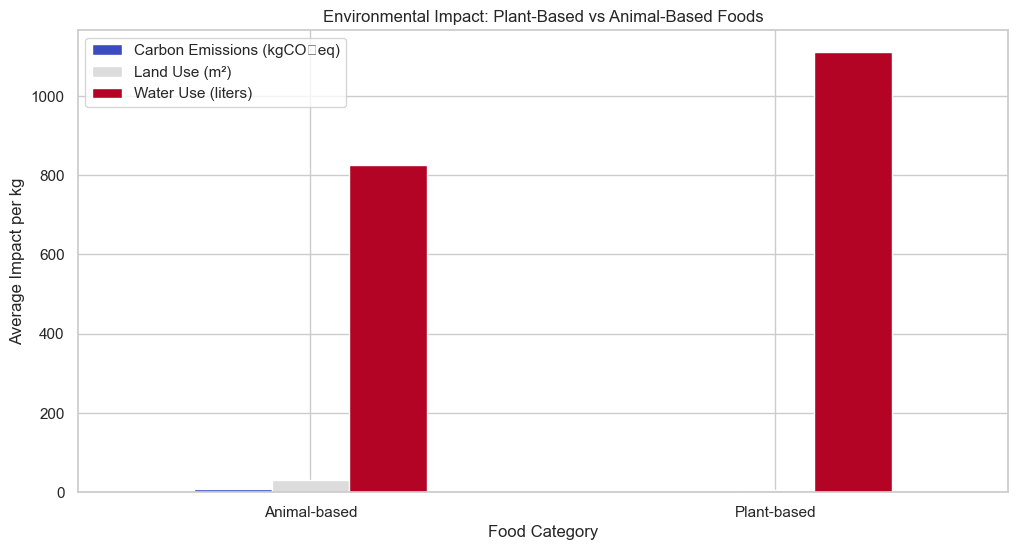

In [12]:
# Categorizing foods into Plant-based vs Animal-based
plant_based = ["Nuts", "Peas", "Tofu", "Oats", "Wheat", "Rice", "Soymilk", "Tomatoes", "Apples"]
df_cleaned["Food Category"] = df_cleaned["Food product"].apply(lambda x: "Plant-based" if x in plant_based else "Animal-based")

# Calculate mean impact per category
category_means = df_cleaned.groupby("Food Category")[["Total_emissions", "Land use per kilogram (m² per kilogram)",
                                                      "Freshwater withdrawals per kilogram (liters per kilogram)"]].mean()

# Plot comparison
category_means.plot(kind="bar", figsize=(12, 6), colormap="coolwarm")
plt.title("Environmental Impact: Plant-Based vs Animal-Based Foods")
plt.ylabel("Average Impact per kg")
plt.xticks(rotation=0)
plt.legend(["Carbon Emissions (kgCO₂eq)", "Land Use (m²)", "Water Use (liters)"])
plt.show()

Insights from the Comparison

Animal-based foods have significantly higher land use, water use, and carbon emissions than plant-based foods.
This confirms that shifting to plant-based diets could reduce the environmental footprint.

c:\Users\lenovo\Documents\Documents\personal\Azubi Africa\Talent Mobility Program\TMP 3\TMP3---Environment-Impact-of-Food-Production-Analysis-\venv\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8324 (\N{SUBSCRIPT FOUR}) missing from font(s) Arial.
  fig.canvas.draw()
c:\Users\lenovo\Documents\Documents\personal\Azubi Africa\Talent Mobility Program\TMP 3\TMP3---Environment-Impact-of-Food-Production-Analysis-\venv\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.draw()
c:\Users\lenovo\Documents\Documents\personal\Azubi Africa\Talent Mobility Program\TMP 3\TMP3---Environment-Impact-of-Food-Production-Analysis-\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8324 (\N{SUBSCRIPT FOUR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\lenovo\Documents\Documents\personal\Azubi Africa\Talent Mobility Program\TMP 3\TMP3---Environment-Impact-of-Food-Produc

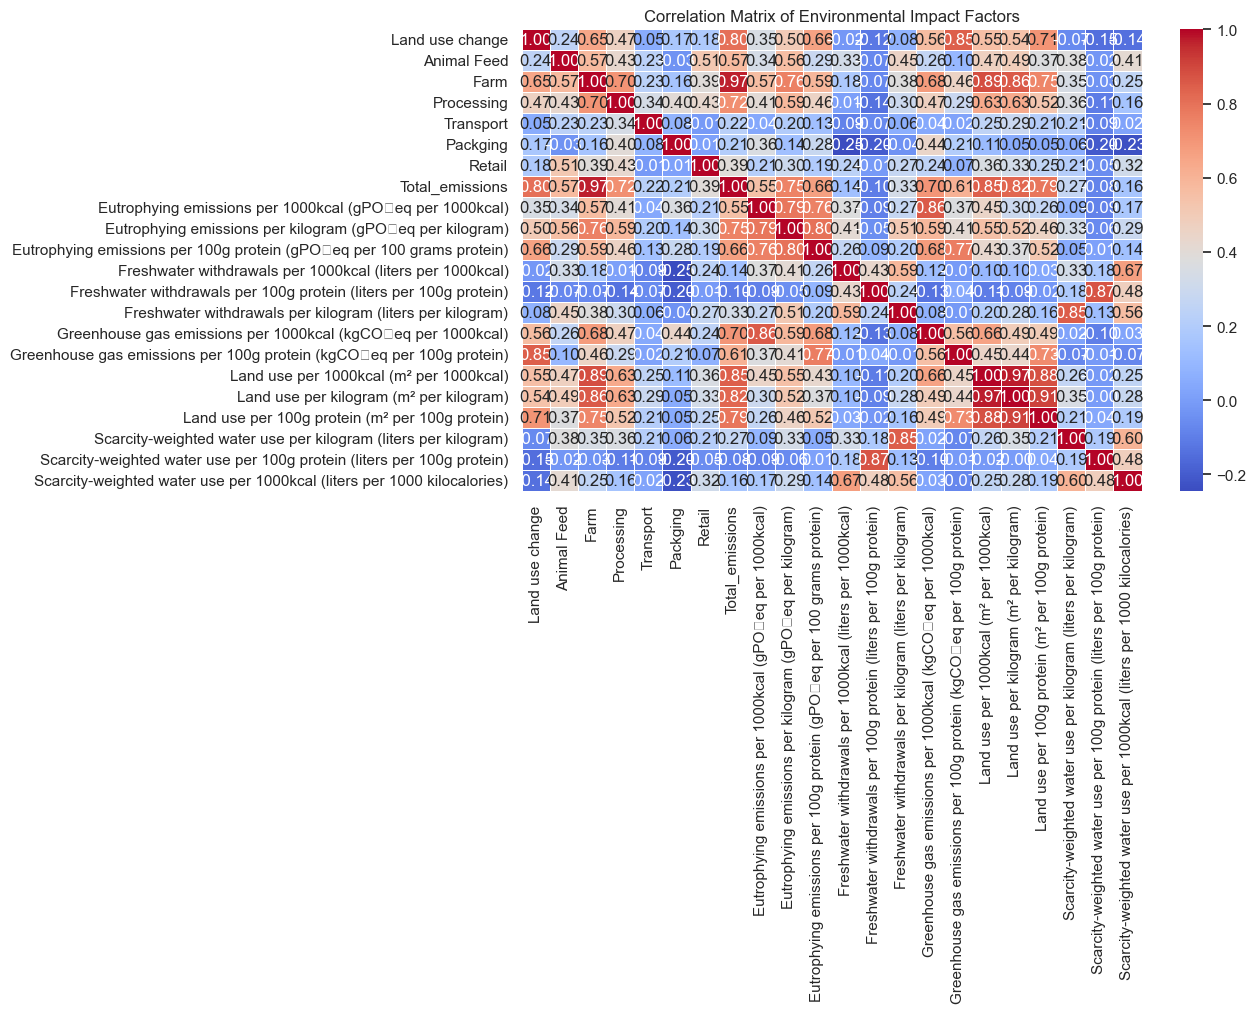

In [13]:
# Compute correlation matrix
corr_matrix = df_cleaned.select_dtypes(include=["number"]).corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Environmental Impact Factors")
plt.show()

Key Findings
Animal-based foods have a significantly larger environmental footprint than plant-based foods.
High-emission foods (e.g., beef, lamb, cheese) also require more land and water, intensifying environmental impact.
Shifting to plant-based diets or improving livestock farming efficiency could reduce emissions.

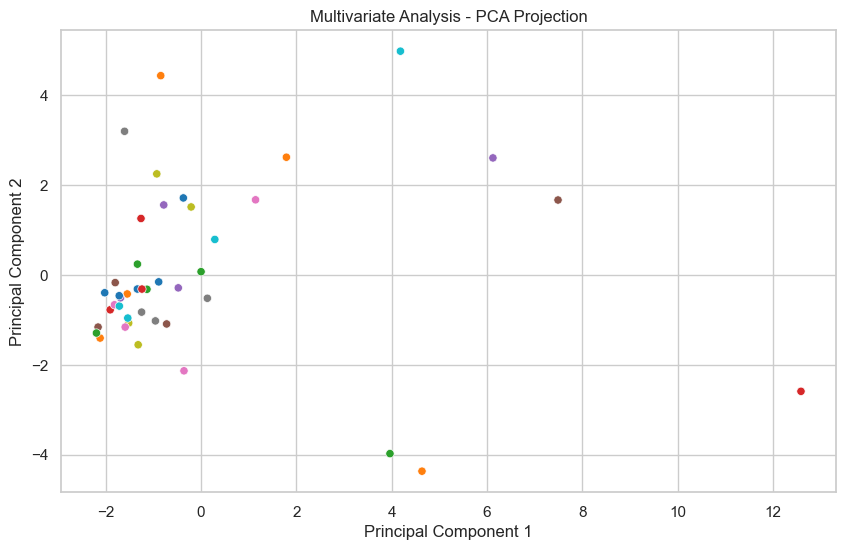

In [14]:
# Standardize data for PCA
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numeric_cols].dropna())

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

# Convert to DataFrame
df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
df_pca['Food Product'] = df['Food product'].dropna().values

# Scatter plot for PCA components
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Food Product', palette='tab10', legend=None)
plt.title("Multivariate Analysis - PCA Projection")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

Multivariate Analysis (PCA) Observations:
The PCA scatter plot shows how food products group based on their environmental impact.

Some products are tightly clustered, indicating similar environmental characteristics, while others are outliers.

Principal Component 1 (PC1) captures most of the variance in the data, likely related to key factors like total emissions and land use. Principal Component 2 (PC2) accounts for additional variability, possibly linked to water usage and energy consumption.

## Feature Engineering 


In [15]:
# Display unique food products
food_products = df["Food product"].unique()
food_products

array(['Wheat & Rye (Bread)', 'Maize (Meal)', 'Barley (Beer)', 'Oatmeal',
       'Rice', 'Potatoes', 'Cassava', 'Cane Sugar', 'Beet Sugar',
       'Other Pulses', 'Peas', 'Nuts', 'Groundnuts', 'Soymilk', 'Tofu',
       'Soybean Oil', 'Palm Oil', 'Sunflower Oil', 'Rapeseed Oil',
       'Olive Oil', 'Tomatoes', 'Onions & Leeks', 'Root Vegetables',
       'Brassicas', 'Other Vegetables', 'Citrus Fruit', 'Bananas',
       'Apples', 'Berries & Grapes', 'Wine', 'Other Fruit', 'Coffee',
       'Dark Chocolate', 'Beef (beef herd)', 'Beef (dairy herd)',
       'Lamb & Mutton', 'Pig Meat', 'Poultry Meat', 'Milk', 'Cheese',
       'Eggs', 'Fish (farmed)', 'Shrimps (farmed)'], dtype=object)

In [16]:
# Define plant-based and animal-based food lists
plant_based = [
    "Wheat & Rye (Bread)", "Maize (Meal)", "Barley (Beer)", "Oatmeal", "Rice", "Potatoes", "Cassava",
    "Cane Sugar", "Beet Sugar", "Soybean Oil", "Palm Oil", "Sunflower Oil", "Rapeseed Oil", "Olive Oil",
    "Other Pulses", "Peas", "Nuts", "Groundnuts", "Soymilk", "Tofu",
    "Tomatoes", "Onions & Leeks", "Root Vegetables", "Brassicas", "Other Vegetables",
    "Citrus Fruit", "Bananas", "Apples", "Berries & Grapes", "Other Fruit",
    "Wine", "Coffee", "Dark Chocolate"
]

animal_based = [
    "Beef (beef herd)", "Beef (dairy herd)", "Lamb & Mutton", "Pig Meat", "Poultry Meat",
    "Milk", "Cheese", "Eggs",
    "Fish (farmed)", "Shrimps (farmed)"
]

# Assign category to a new column
df["Category"] = df["Food product"].apply(lambda x: "Plant-Based" if x in plant_based else "Animal-Based")

# Check the result
df[["Food product", "Category"]].head(10)

,Food product,Category
0,Wheat & Rye (Bread),Plant-Based
1,Maize (Meal),Plant-Based
2,Barley (Beer),Plant-Based
3,Oatmeal,Plant-Based
4,Rice,Plant-Based
5,Potatoes,Plant-Based
6,Cassava,Plant-Based
7,Cane Sugar,Plant-Based
8,Beet Sugar,Plant-Based
9,Other Pulses,Plant-Based


In [17]:
#  need all columns that measure water consumption.

water_columns = [col for col in df.columns if "water" in col.lower() or "withdrawals" in col.lower()]
print(water_columns)

['Freshwater withdrawals per 1000kcal (liters per 1000kcal)', 'Freshwater withdrawals per 100g protein (liters per 100g protein)', 'Freshwater withdrawals per kilogram (liters per kilogram)', 'Scarcity-weighted water use per kilogram (liters per kilogram)', 'Scarcity-weighted water use per 100g protein (liters per 100g protein)', 'Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)']


In [18]:
# also need all columns that measure land footprint

land_columns = [col for col in df.columns if "land use" in col.lower()]
print(land_columns)

['Land use change', 'Land use per 1000kcal (m² per 1000kcal)', 'Land use per kilogram (m² per kilogram)', 'Land use per 100g protein (m² per 100g protein)']


In [19]:
df["Total Water Use"] = df[
    [
        "Freshwater withdrawals per 1000kcal (liters per 1000kcal)",
        "Freshwater withdrawals per 100g protein (liters per 100g protein)",
        "Freshwater withdrawals per kilogram (liters per kilogram)",
        "Scarcity-weighted water use per kilogram (liters per kilogram)",
        "Scarcity-weighted water use per 100g protein (liters per 100g protein)",
        "Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)"
    ]
].sum(axis=1)

In [20]:
df["Total Land Use"] = df[
    [
        "Land use change",
        "Land use per 1000kcal (m² per 1000kcal)",
        "Land use per kilogram (m² per kilogram)",
        "Land use per 100g protein (m² per 100g protein)"
    ]
].sum(axis=1)

In [21]:
# confirm changes made

df.head()

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),...,Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories),Category,Total Water Use,Total Land Use
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,7.000000,...,6.500000,2.976244,6.865,7.936314,14533.05,20917.213595,12605.256790,Plant-Based,49894.007070,17.877558
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,7.000000,...,6.500000,2.976244,6.865,7.936314,14533.05,20917.213595,12605.256790,Plant-Based,49894.007070,18.077558
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,7.000000,...,6.500000,2.976244,6.865,7.936314,14533.05,20917.213595,12605.256790,Plant-Based,49894.007070,17.777558
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,...,1.907692,2.897446,7.600,5.846154,18786.20,14450.923080,7162.104461,Plant-Based,41436.616016,16.343600
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,...,6.267606,0.759631,2.800,3.943662,49576.30,69825.774650,13449.891480,Plant-Based,138877.110415,7.503293


Standardization & Scaling 

In [22]:
scaler = StandardScaler()
df[["Total_emissions", "Total Water Use", "Total Land Use"]] = scaler.fit_transform(
    df[["Total_emissions", "Total Water Use", "Total Land Use"]]
)

In [23]:
df[["Total_emissions", "Total Water Use", "Total Land Use"]].describe()

,Total_emissions,Total Water Use,Total Land Use
count,4.300000e+01,4.300000e+01,4.300000e+01
mean,-3.356488e-17,6.196594e-17,2.969201e-17
std,1.011835e+00,1.011835e+00,1.011835e+00
min,-5.561361e-01,-8.825663e-01,-4.023539e-01
25%,-4.935092e-01,-5.676334e-01,-3.423360e-01
50%,-4.212473e-01,-4.335943e-01,-3.032245e-01
75%,2.688813e-03,1.015520e-01,-2.295384e-01
max,5.167002e+00,3.536182e+00,4.485722e+00


## Hypothesis Testing 

Null Hypothesis (H₀): There is no significant difference in environmental impact(Total Emissions) between plant-based and animal-based foods.

Alternative Hypothesis (H₁): Animal-based foods have a significantly higher environmental impact(Total Emissions) than plant-based foods.

Check normality (Shapiro-Wilk test or visualization like histograms).

Check variance equality (Levene’s test) if comparing multiple groups.

Choose the right statistical test:

If variances are equal → use parametric tests (t-test, ANOVA).

If variances are unequal → use Welch’s t-test (for two groups) or Welch’s ANOVA (for multiple groups).

In [25]:
# Separate the groups
plant_emissions = df[df["Category"] == "Plant-Based"]["Total_emissions"]
animal_emissions = df[df["Category"] == "Animal-Based"]["Total_emissions"]

# 1️⃣ Normality Test (Shapiro-Wilk Test)
shapiro_plant = shapiro(plant_emissions)
shapiro_animal = shapiro(animal_emissions)

print(f"Shapiro Test for Plant-Based: p-value = {shapiro_plant.pvalue:.4f}")
print(f"Shapiro Test for Animal-Based: p-value = {shapiro_animal.pvalue:.4f}")

# 2️⃣ Variance Test (Levene’s Test)
levene_test = levene(plant_emissions, animal_emissions)
print(f"Levene’s Test for Equal Variance: p-value = {levene_test.pvalue:.4f}")

Shapiro Test for Plant-Based: p-value = 0.0000
Shapiro Test for Animal-Based: p-value = 0.0040
Levene’s Test for Equal Variance: p-value = 0.0018


Interpretation of the Test Results:
Shapiro-Wilk Test for Normality

Plant-Based (p = 0.0000) → The p-value is extremely low, meaning we reject the null hypothesis that the data is normally distributed.

Animal-Based (p = 0.0040) → Again, the p-value is low, so we reject the null hypothesis. The data is not normally distributed in both groups.

Levene’s Test for Equal Variances

p = 0.0018 → Since the p-value is below 0.05, we reject the null hypothesis that the variances are equal. This means that the variance in emissions between plant-based and animal-based foods is significantly different.

Since the data is not normally distributed, a non-parametric test should be used instead of a t-test.

Mann-Whitney U Test (Wilcoxon Rank-Sum Test)
This test is suitable for comparing two independent, non-normally distributed groups.

In [27]:
# Perform Mann-Whitney U test (alternative="greater" since we assume animal-based emissions > plant-based)
u_stat, p_value = mannwhitneyu(plant_emissions, animal_emissions, alternative="greater")

print(f"Mann-Whitney U Test Results: U-statistic = {u_stat:.4f}, p-value = {p_value:.4f}")

Mann-Whitney U Test Results: U-statistic = 27.0000, p-value = 1.0000


p-value = 1.0000

Decision: Fail to Reject H₀ Since p-value > 0.05, we fail to reject the null hypothesis. This means:

There is no significant difference in environmental impact (Total Emissions) between plant-based and animal-based foods.

This could mean that some plant-based foods (like; nuts, oils, other fruits) contribute heavily to emissions, balancing out the difference.